## Notes for FINAL PROJECT

<i>Notes for the Final Project--experiments, broken code, etcetera.
</i>

In [1]:
#import Panda and Numpy and other libraries for use
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
#to view our charts inline, not a separate window

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn import tree 
#for our secondary regression test, seeing if 
#tree or LogReg give vastly different results

In [2]:
#defining data location
location = "Kickstartercombo.csv"
ks_df = pd.read_csv(location, low_memory=False)
ks_df.head()

,Unnamed: 0,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real
0,0,1000002330,The Songs of Adelaide & Abullah,Publishing,Poetry,GB,failed,1000.0,0.0,GBP,2015-08-11 12:12:00,2015-10-09 11:36:00,0,0.0,NaN,NaN
1,1,1000004038,Where is Hank?,Film & Video,Narrative Film,US,failed,45000.0,220.0,USD,2013-01-12 00:20:00,2013-02-26 00:20:00,3,220.0,NaN,NaN
2,2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,failed,5000.0,1.0,USD,2012-03-17 03:24:00,2012-04-16 04:24:00,1,1.0,NaN,NaN
3,3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,US,canceled,19500.0,1283.0,USD,2015-07-04 08:35:00,2015-08-29 01:00:00,14,1283.0,NaN,NaN
4,4,1000014025,Monarch Espresso Bar,Food,Restaurants,US,successful,50000.0,52375.0,USD,2016-02-26 13:38:00,2016-04-01 13:38:00,224,52375.0,NaN,NaN


In [3]:
ks_df.shape

(702411, 16)

In [4]:
ks_df.columns

Index(['Unnamed: 0', 'ID', 'name', 'main_category', 'category', 'country',
       'state', 'goal', 'pledged', 'currency', 'launched', 'deadline',
       'backers', 'usd pledged', 'usd_goal_real', 'usd_pledged_real'],
      dtype='object')

#### Columns that seem to be important, just from looking over this.
<p>Goal</p>
Pledged
<p>State (failed, etc)</p>
pledged_real
<p>goal</p>
Backers
<p>(??)Launched</p>

#### Columns we can probably ignore
ID,
NAME,
Category,
Country,
State,
Launched,

In [5]:
ks_df.isnull().sum()

Unnamed: 0               0
ID                       0
name                     8
main_category            0
category                 0
country                  0
state                    0
goal                     0
pledged                  0
currency                 0
launched                 0
deadline                 0
backers                  0
usd pledged           7594
usd_goal_real       323750
usd_pledged_real    323750
dtype: int64

In [6]:
#seeing what the average number of backers were for projects by status
#I suspect that determines how successful a project is,
#and whether we would want to invest
ks_df['backers'].groupby(ks_df['state']).mean()


state
canceled       25.606675
failed         16.576774
live           75.498757
successful    259.115265
suspended     108.983759
undefined       0.000000
Name: backers, dtype: float64

In [7]:
#money asked for vs. money raised
def cash(fn,ln):
    return fn / ln
 
ks_df['money'] = cash(ks_df['pledged'],ks_df['goal'])
ks_df.head()

,Unnamed: 0,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real,money
0,0,1000002330,The Songs of Adelaide & Abullah,Publishing,Poetry,GB,failed,1000.0,0.0,GBP,2015-08-11 12:12:00,2015-10-09 11:36:00,0,0.0,NaN,NaN,0.000000
1,1,1000004038,Where is Hank?,Film & Video,Narrative Film,US,failed,45000.0,220.0,USD,2013-01-12 00:20:00,2013-02-26 00:20:00,3,220.0,NaN,NaN,0.004889
2,2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,failed,5000.0,1.0,USD,2012-03-17 03:24:00,2012-04-16 04:24:00,1,1.0,NaN,NaN,0.000200
3,3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,US,canceled,19500.0,1283.0,USD,2015-07-04 08:35:00,2015-08-29 01:00:00,14,1283.0,NaN,NaN,0.065795
4,4,1000014025,Monarch Espresso Bar,Food,Restaurants,US,successful,50000.0,52375.0,USD,2016-02-26 13:38:00,2016-04-01 13:38:00,224,52375.0,NaN,NaN,1.047500


In [8]:
#saving that averages list as a spreasdheet for demo in Tableau later
#but I cannot get it to work, so...well
#backing = ks_df['backers'].groupby(ks_df['state']).mean()

#back = pd.DataFrame(data = backing, columns=['State','Avg. Backing Count']

#writer = pd.ExcelWriter('avg-back.xlsx', engine='xlsxwriter')
#back.to_excel(writer, sheet_name='Sheet1')
#writer.save()

In [9]:
#creating a dataframe with the more relevant data for backers
backers = pd.DataFrame(data=ks_df, columns=['money','backers','state','goal','pledged'])
backers.head()

,money,backers,state,goal,pledged
0,0.000000,0,failed,1000.0,0.0
1,0.004889,3,failed,45000.0,220.0
2,0.000200,1,failed,5000.0,1.0
3,0.065795,14,canceled,19500.0,1283.0
4,1.047500,224,successful,50000.0,52375.0


In [10]:
#dummies for state
fail = pd.get_dummies(data=backers,columns=['state'])
fail.head()

,money,backers,goal,pledged,state_canceled,state_failed,state_live,state_successful,state_suspended,state_undefined
0,0.000000,0,1000.0,0.0,0,1,0,0,0,0
1,0.004889,3,45000.0,220.0,0,1,0,0,0,0
2,0.000200,1,5000.0,1.0,0,1,0,0,0,0
3,0.065795,14,19500.0,1283.0,1,0,0,0,0,0
4,1.047500,224,50000.0,52375.0,0,0,0,1,0,0


[Text(0.5,0,'Backer Count')]

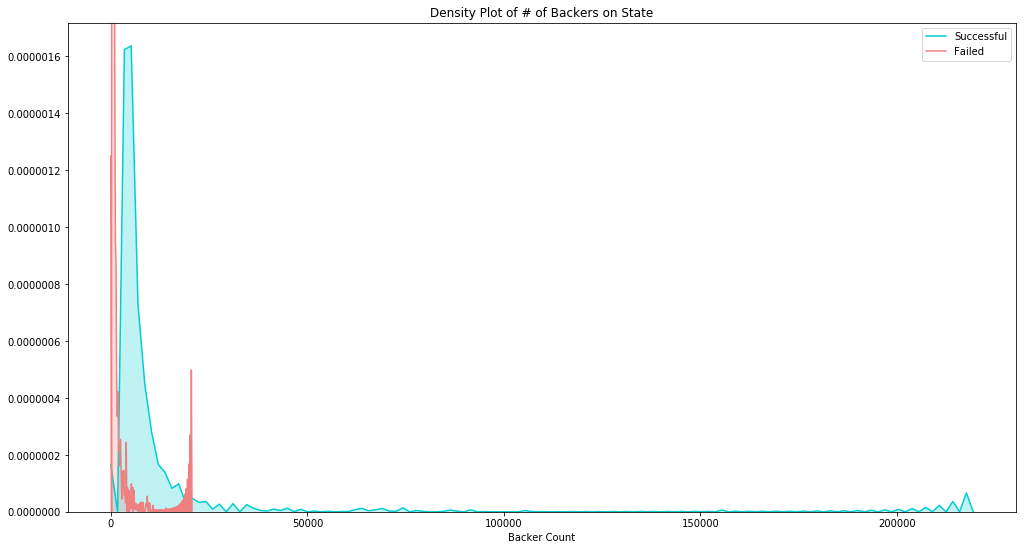

In [11]:
#how does backers influence success just at a glance? Does it...
plt.figure(figsize=(17,9))

ax = sns.kdeplot(fail['backers'][fail['state_successful'] == 1], #successful
                 color="darkturquoise",
                 shade=True)

sns.kdeplot(fail['backers'][fail['state_successful'] == 0], #pretty much losers
            color="lightcoral",
            shade=True)

plt.legend (['Successful', 'Failed'])
plt.title("Density Plot of # of Backers on State")

ax.set(xlabel='Backer Count')
#plt.show()

In [12]:
fail.isnull().sum()

money               0
backers             0
goal                0
pledged             0
state_canceled      0
state_failed        0
state_live          0
state_successful    0
state_suspended     0
state_undefined     0
dtype: int64

In [13]:
fail2 = fail.drop(['state_canceled','state_failed','state_live','state_suspended','state_undefined'], axis=1)
fail2.head()

,money,backers,goal,pledged,state_successful
0,0.000000,0,1000.0,0.0,0
1,0.004889,3,45000.0,220.0,0
2,0.000200,1,5000.0,1.0,0
3,0.065795,14,19500.0,1283.0,0
4,1.047500,224,50000.0,52375.0,1


In [14]:
#starting logistic regression
y = fail2['state_successful']

In [15]:
#independent variable
X = fail2.drop(['state_successful'], axis=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=32342)



In [17]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
LogReg.score(X_train, y_train)

0.98321255866706525

In [19]:
y_pred = LogReg.predict(X_test)

In [20]:
cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Failure','Predicted Success'],
    index=['True Failure','True Success']
)
cm

,Predicted Failure,Predicted Success
True Failure,177628,4687
True Success,72,98578


In [21]:
LogReg.score(X_test, y_test)

0.98306194721762497

In [22]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99    182315
          1       0.95      1.00      0.98     98650

avg / total       0.98      0.98      0.98    280965



### Hallelujah we got it to work (I think), and it even got a 98% accuracy!

In [23]:
fail2.columns

Index(['money', 'backers', 'goal', 'pledged', 'state_successful'], dtype='object')

In [24]:
#Now to test whether or not money raised has an impact!
#maybe I just did this so that it made sense and worked to compensate
#for the epic failure of yesterday's Project 3...
X2 = fail2.drop(['money'], axis=1)


In [25]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.4, random_state=32342)



In [26]:
LogReg.fit(X2_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
LogReg.score(X2_train, y_train)

0.98321018588383802

In [28]:
y2_pred = LogReg.predict(X2_test)

In [29]:
cm2 = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Failure','Predicted Success'],
    index=['True Failure','True Success']
)
cm2

,Predicted Failure,Predicted Success
True Failure,177628,4687
True Success,72,98578


In [30]:
LogReg.score(X2_test,y_test)

0.98304771056893203

In [31]:
print(classification_report(y_test,y2_pred))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99    182315
          1       0.95      1.00      0.98     98650

avg / total       0.98      0.98      0.98    280965



In [32]:
#more money more problems?
X3 = fail2.drop(['state_successful','goal','money'], axis=1)


In [33]:
y3 = fail2['state_successful']

In [34]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.4, random_state=32342)
#now it is seeing if asking for too much money is recipe for disaster

In [35]:
LogReg.fit(X3_train, y3_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
LogReg.score(X3_train,y3_train)

0.98321255866706525

In [37]:
y3_pred = LogReg.predict(X3_test)

In [38]:
cm3 = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

cm3

,Predicted Not Survival,Predicted Survival
True Not Survival,177628,4687
True Survival,72,98578


In [39]:
LogReg.score(X3_test, y3_test)

0.98306194721762497

In [40]:
print(classification_report(y3_test, y3_pred))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99    182315
          1       0.95      1.00      0.98     98650

avg / total       0.98      0.98      0.98    280965



## Field (of Project)

In [41]:
ks_df.columns

Index(['Unnamed: 0', 'ID', 'name', 'main_category', 'category', 'country',
       'state', 'goal', 'pledged', 'currency', 'launched', 'deadline',
       'backers', 'usd pledged', 'usd_goal_real', 'usd_pledged_real', 'money'],
      dtype='object')

In [42]:
field = pd.DataFrame(data=ks_df, columns=['main_category','category','money','state'])
field.head()

,main_category,category,money,state
0,Publishing,Poetry,0.000000,failed
1,Film & Video,Narrative Film,0.004889,failed
2,Music,Music,0.000200,failed
3,Film & Video,Film & Video,0.065795,canceled
4,Food,Restaurants,1.047500,successful


In [43]:
categ = pd.get_dummies(data= field, columns=['state'])
categ.head()

,main_category,category,money,state_canceled,state_failed,state_live,state_successful,state_suspended,state_undefined
0,Publishing,Poetry,0.000000,0,1,0,0,0,0
1,Film & Video,Narrative Film,0.004889,0,1,0,0,0,0
2,Music,Music,0.000200,0,1,0,0,0,0
3,Film & Video,Film & Video,0.065795,1,0,0,0,0,0
4,Food,Restaurants,1.047500,0,0,0,1,0,0


In [44]:
categ = categ.drop(['main_category','state_canceled','state_failed','state_live','state_suspended','state_undefined'], axis=1)
categ.head()

,category,money,state_successful
0,Poetry,0.000000,0
1,Narrative Film,0.004889,0
2,Music,0.000200,0
3,Film & Video,0.065795,0
4,Restaurants,1.047500,1


In [45]:
categ = pd.get_dummies(data=categ, columns=['category'])
categ.head()

,money,state_successful,category_ Religion,category_3D Printing,category_Academic,category_Accessories,category_Action,category_Animals,category_Animation,category_Anthologies,...,category_Wearables,category_Weaving,category_Web,category_Webcomics,category_Webseries,category_Woodworking,category_Workshops,category_World Music,category_Young Adult,category_Zines
0,0.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.004889,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000200,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.065795,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.047500,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
y4 = categ['state_successful']

In [47]:
X4 = categ.drop(['state_successful'],axis=1)

In [48]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.4, random_state=33423)


In [49]:
LogReg.fit(X4_train, y4_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
LogReg.score(X4_train, y4_train)

0.7611532675597823

In [51]:
y4_pred = LogReg.predict(X4_test)

In [52]:
cm4 = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

cm4

,Predicted Not Survival,Predicted Survival
True Not Survival,177628,4687
True Survival,72,98578


In [53]:
LogReg.score(X4_test,y4_test)

0.76142935952876689

In [54]:
print(classification_report(y4_test, y4_pred))

             precision    recall  f1-score   support

          0       0.75      0.95      0.84    181999
          1       0.82      0.42      0.55     98966

avg / total       0.77      0.76      0.74    280965



## Less accurate than other measures, but still useful!

In [68]:
#saving that averages list as a spreasdheet for demo in Tableau later
#but I cannot get it to work, so...well
#backing = ks_df['fail'].groupby(ks_df['state']).mean()


#writer = pd.ExcelWriter('failure.xlsx', engine='xlsxwriter')
#fail.to_excel("failure.xlsx", engine='xlsxwriter')

#with pd.ExcelWriter('final.xlsx') as writer:
backers.to_csv('backers.csv',index=False,header=True)
fail2.to_csv('fail2.csv', index=False,header=True)
categ.to_csv('category.csv', index=False,header=True)

In [ ]:
#names = ['Tom','Joe']
#grades = [44,32]
#GradeList = list(zip(names,grades))

#df = pd.DataFrame(data = GradeList, columns =['Names','Grades'])
#writer = pd.csvWriter('grades324.csv', engine='csvwriter')
#df.to_csv(writer)
#writer.save()